In [1]:
import warnings; warnings.simplefilter('ignore')

import hotspot
import scanpy as sc
import muon as mu

import numpy as np
import mplscience
import os
hotspot.__version__

'1.1.1'

In [2]:
adata1=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [3]:
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_h5")

In [4]:
import glob
H5data=[]
for line in  glob.glob("*h5"):
    # print(line)
    H5data.append(line)
print(H5data)

['Z48_filtered_feature_bc_matrix.h5', 'Z53_filtered_feature_bc_matrix.h5', 'Z96_filtered_feature_bc_matrix.h5', 'D25_filtered_feature_bc_matrix.h5', 'D36_filtered_feature_bc_matrix.h5', 'Z99_filtered_feature_bc_matrix.h5', 'Z38_filtered_feature_bc_matrix.h5', 'Z67_filtered_feature_bc_matrix.h5', 'Z07_filtered_feature_bc_matrix.h5', 'B25_filtered_feature_bc_matrix.h5', 'D9_filtered_feature_bc_matrix.h5', 'D27_filtered_feature_bc_matrix.h5', 'Z52_filtered_feature_bc_matrix.h5', 'Z47_filtered_feature_bc_matrix.h5', 'Z77_filtered_feature_bc_matrix.h5', 'Z03_filtered_feature_bc_matrix.h5', 'C10_filtered_feature_bc_matrix.h5', 'Z42_filtered_feature_bc_matrix.h5', 'C27_filtered_feature_bc_matrix.h5', 'C36_filtered_feature_bc_matrix.h5', 'Z70_filtered_feature_bc_matrix.h5', 'Z79_filtered_feature_bc_matrix.h5', 'z104_filtered_feature_bc_matrix.h5', 'Z36_filtered_feature_bc_matrix.h5', 'Z43_filtered_feature_bc_matrix.h5', 'Z28_filtered_feature_bc_matrix.h5', 'Z33_filtered_feature_bc_matrix.h5', 

In [5]:
filenames =H5data
adatadict_sc={}
# adatas = []
# scrub_doublet_rate=pd.DataFrame()
i=0
for filename in filenames: 
    
    dat1=sc.read_10x_h5(filename)
    name=filename.rsplit("_")[0]
    dat1.obs_names=name+"_"+dat1.obs_names 
    dat1.obs["Name"]=name 
    dat1.var_names_make_unique() 
    i+=1
    adatadict_sc[name]=dat1

In [6]:
# Import the required function
from anndata import concat

# Get the list of Anndata objects from the dictionary
adata_list = list(adatadict_sc.values())

# Concatenate the Anndata objects
adata_merged = concat(adata_list, join='outer')


In [14]:
adata=adata_merged[adata1[adata1.obs.New_Body.isin(["PBMC"])].obs_names]

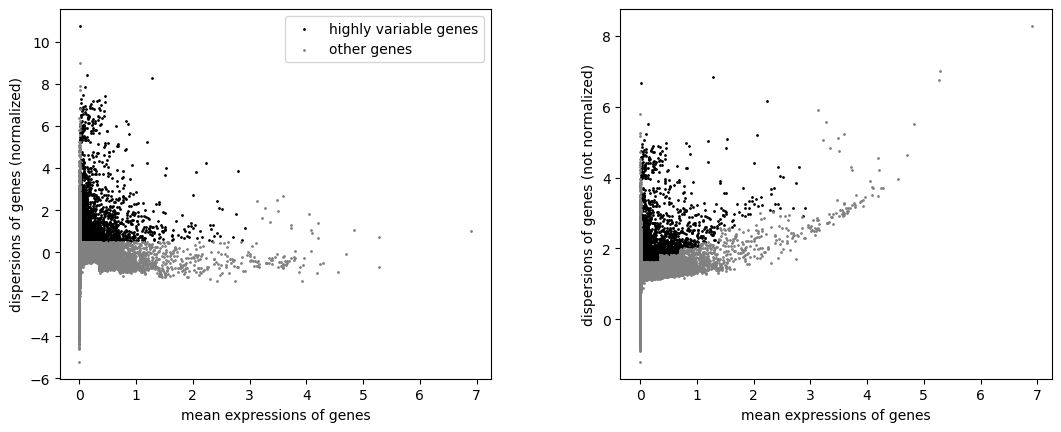

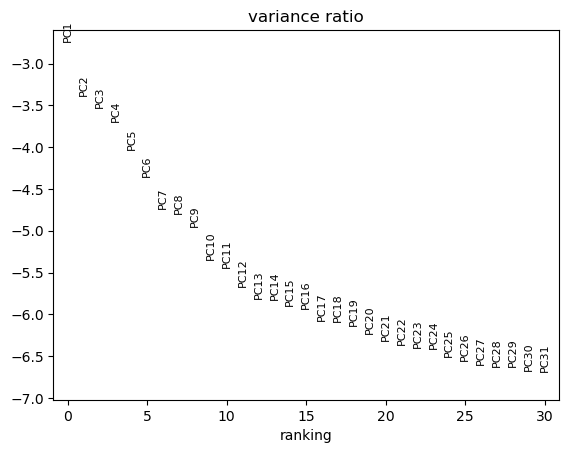

UMAP


In [17]:

sc.pp.filter_cells(adata, min_genes=200)

sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
#              jitter=0.4, multi_panel=True)



sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)
adata.uns['log1p']["base"] = None

adata.raw = adata

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.pl.highly_variable_genes(adata)

adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ['total_counts',  'pct_counts_mt'])

sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='arpack')

# sc.pl.pca(adata, color='CST3')

sc.pl.pca_variance_ratio(adata, log=True)

# adata.write_h5ad("../All_scanpyData/D2_scanpy_merge_rmdoubulet_log1p_PCA.h5ad")

print("UMAP")

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)


# adata.write_h5ad("../All_scanpyData/D2_scanpy_merge_rmdoubulet_UMAP2.h5ad")




In [24]:
adata3=adata

In [26]:

selected_genes = ~adata3.var_names.str.startswith('MT')

selected_genes 
adata3 = adata3[:, selected_genes]

In [27]:

selected_genes2 = ~adata3.var_names.str.startswith('RP')

selected_genes 
adata3 = adata3[:, selected_genes2]

In [30]:
adata3

View of AnnData object with n_obs × n_vars = 172432 × 2409
    obs: 'Name', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [32]:
adata11=adata1[adata3.obs_names,:]

In [33]:
adata3.obs_names.equals(adata11.obs_names)

True

In [35]:
adata3.obs['Last_cell_type']="NA"

In [36]:
adata3.obs.loc[adata11.obs_names,'Last_cell_type']=adata11.obs['Last_cell_type']

In [38]:
adata2= adata_merged[adata11.obs_names,adata3.var_names] 

In [39]:
adata2

View of AnnData object with n_obs × n_vars = 172432 × 2409
    obs: 'Name'

In [40]:
non_zero_genes_mask = np.array(adata2.X.sum(axis=0) > 0).flatten()
adata2 = adata2[:, non_zero_genes_mask]

In [41]:
adata2

View of AnnData object with n_obs × n_vars = 172432 × 2409
    obs: 'Name'

In [42]:
adata3.layers["counts"] = adata2.X.copy()

In [43]:
adata3.layers["counts_csc"] = adata3.layers["counts"].tocsc()

In [44]:
adata3.layers["log_normalized"] = adata3.X.copy()

In [45]:
adata3.write_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/D2024_hotspot.h5ad')

In [46]:
# hs = hotspot.Hotspot(
#     adata3,
#     layer_key="counts_csc",
#     model='danb',
#     latent_obsm_key="X_pca",
#     umi_counts_obs_key="total_counts"
# )

# hs.create_knn_graph(
#     weighted_graph=False, n_neighbors=25,
# )

In [48]:

# import pickle
# with open("/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Data//2024_HShotspot_vargenes.pkl", "wb") as file:
#     pickle.dump(hs, file)

In [49]:
# hs_results = hs.compute_autocorrelations(jobs=90)
# hs_results.head(15)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2409/2409 [00:09<00:00, 255.28it/s]


,C,Z,Pval,FDR
Gene,,,,
CAMP,0.329157,6943.755103,0.0,0.0
SLC26A3,0.544278,6755.867635,0.0,0.0
HIST1H4H,0.627919,6532.842359,0.0,0.0
NRGN,0.880051,6436.009847,0.0,0.0
PPBP,0.848627,5727.141799,0.0,0.0
SPARC,0.685878,4977.388742,0.0,0.0
SOX6,0.709333,4842.561414,0.0,0.0
MYL9,0.671054,4749.609484,0.0,0.0
RGS6,0.591198,4725.330506,0.0,0.0


In [50]:
adata4=adata3

In [53]:
adata4.obs['Name'].equals(adata11.obs['Name'])

True

In [54]:
adata4.obs['AdjustedID']=adata11.obs['AdjustedID']

In [55]:
adata4.obs['AdjustedID']

Z48_AAACCTGAGATAGGAG-1      B17.4_P3
Z48_AAACCTGAGGCACATG-1      B17.4_P3
Z48_AAACCTGAGGTGCAAC-1      B17.4_P3
Z48_AAACCTGCAAGAGTCG-1      B17.4_P3
Z48_AAACCTGCACACCGAC-1      B17.4_P3
                             ...    
Z123_TTTGTCATCGCAAGCC-1    B22.4_P23
Z123_TTTGTCATCTAACTCT-1    B22.4_P23
Z123_TTTGTCATCTACTTAC-1    B22.4_P23
Z123_TTTGTCATCTCCCTGA-1    B22.4_P23
Z123_TTTGTCATCTGGTGTA-1    B22.4_P23
Name: AdjustedID, Length: 172432, dtype: category
Categories (22, object): ['B11.6_P24' < 'B12.0_P2' < 'B17.4_P3' < 'B18.0_P4' ... 'B36.1_P19' < 'B37.9_P20' < 'B38.1_P21' < 'B39.1_P22']

In [56]:
adata4.obs['Week']=adata4.obs['AdjustedID'].str.split("_",expand=True)[0]
adata4.obs['Week']=adata4.obs['Week'].str.split("B",expand=True)[1].astype('float')

In [57]:
adata4.obs['Week']

Z48_AAACCTGAGATAGGAG-1     17.4
Z48_AAACCTGAGGCACATG-1     17.4
Z48_AAACCTGAGGTGCAAC-1     17.4
Z48_AAACCTGCAAGAGTCG-1     17.4
Z48_AAACCTGCACACCGAC-1     17.4
                           ... 
Z123_TTTGTCATCGCAAGCC-1    22.4
Z123_TTTGTCATCTAACTCT-1    22.4
Z123_TTTGTCATCTACTTAC-1    22.4
Z123_TTTGTCATCTCCCTGA-1    22.4
Z123_TTTGTCATCTGGTGTA-1    22.4
Name: Week, Length: 172432, dtype: float64

In [58]:
adata4.obs.loc[adata4[adata4.obs['Week']>26].obs_names,"Stage"]='Late'
adata4.obs.loc[adata4[adata4.obs['Week']<=26].obs_names,"Stage"]='Early'

In [64]:
PBMC=adata4

In [65]:
PBMC

AnnData object with n_obs × n_vars = 172432 × 2409
    obs: 'Name', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'AdjustedID', 'Week', 'Stage'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_csc', 'log_normalized'
    obsp: 'distances', 'connectivities'

In [61]:
PBMC.obs.Stage.value_counts()

Early    89708
Late     82724
Name: Stage, dtype: int64

In [62]:
# PBMCnon_zero_genes_mask = np.array(PBMC.X.sum(axis=0) > 0).flatten()
# PBMC = PBMC[:, PBMCnon_zero_genes_mask]
# PBMC

View of AnnData object with n_obs × n_vars = 172432 × 365
    obs: 'Name', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'AdjustedID', 'Week', 'Stage'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_csc', 'log_normalized'
    obsp: 'distances', 'connectivities'

In [66]:
PBMC_Late1=PBMC[PBMC.obs.Stage.isin(["Late"])]
PBMC_Late2=adata_merged[PBMC_Late1.obs_names,PBMC_Late1.var_names]
PBMC_Late1
PBMC_Late1.layers["log_normalized"] = PBMC_Late1.X.copy()
PBMC_Late1.layers["counts"]= PBMC_Late2.X.copy()
PBMC_Late1.layers["counts_csc"] = PBMC_Late1.layers["counts"].tocsc()

In [67]:
PBMC_Late1

AnnData object with n_obs × n_vars = 82724 × 2409
    obs: 'Name', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'AdjustedID', 'Week', 'Stage'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_csc', 'log_normalized'
    obsp: 'distances', 'connectivities'

In [68]:
hsPBMC_Late= hotspot.Hotspot(
   PBMC_Late1,
    layer_key="counts_csc",
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="total_counts"
)

hsPBMC_Late.create_knn_graph(
    weighted_graph=False, n_neighbors=25,
)

In [69]:
hsPBMC_Late_results = hsPBMC_Late.compute_autocorrelations(jobs=90)

hsPBMC_Late_results.head(15)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2409/2409 [00:07<00:00, 328.76it/s]


,C,Z,Pval,FDR
Gene,,,,
PPBP,0.846010,4640.372985,0.0,0.0
SOX6,0.753213,4296.198671,0.0,0.0
SLC26A3,0.548802,4241.035620,0.0,0.0
NRGN,0.858849,4115.877391,0.0,0.0
RGS6,0.590734,3525.208557,0.0,0.0
XPO7,0.748273,3150.339562,0.0,0.0
TSPAN5,0.681326,3127.369464,0.0,0.0
NKG7,0.892119,2910.919621,0.0,0.0
SPARC,0.651871,2840.545416,0.0,0.0


In [73]:
hsPBMC_Late_results_genes = hsPBMC_Late_results.loc[hsPBMC_Late_results.FDR < 0.05].sort_values('Z', ascending=False).index
hsPBMC_Late_results_genes

Index(['PPBP', 'SOX6', 'SLC26A3', 'NRGN', 'RGS6', 'XPO7', 'TSPAN5', 'NKG7',
       'SPARC', 'TUBB1',
       ...
       'IGKV2-29', 'IGHV4-61', 'IGKV2D-30', 'SOX2-OT', 'TRBV6-4', 'OVCH1-AS1',
       'IGKV1D-13', 'MYRFL', 'IGHV3-53', 'AL356804.1'],
      dtype='object', name='Gene', length=2402)

Index(['PPBP', 'SOX6', 'SLC26A3', 'NRGN', 'RGS6', 'XPO7', 'TSPAN5', 'NKG7',
       'SPARC', 'TUBB1',
       ...
       'IGKV2-29', 'IGHV4-61', 'IGKV2D-30', 'SOX2-OT', 'TRBV6-4', 'OVCH1-AS1',
       'IGKV1D-13', 'MYRFL', 'IGHV3-53', 'AL356804.1'],
      dtype='object', name='Gene', length=2402)

In [ ]:
hsPBMC_Late_results_genes=hsPBMC_Late.compute_local_correlations(hsPBMC_Late_results_genes, jobs=90)

Computing pair-wise local correlation on 2402 features...


 25%|█████████████████████████████████████████████████████████████▋                                                                                                                                                                                      | 728815/2883601 [02:54<07:36, 4716.48it/s]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


colors = ["#FF5A00", "#663366","#FF6666","#8F1336", "#0081C9", "#001588", "#CC0033",
"#CC9966","#999933","#009966","#CCCC33","#CCFF99","#0eb0c8","#993333",]


cmap2 = ListedColormap(colors)

from matplotlib.colors import LinearSegmentedColormap


data = np.random.rand(10, 10)


colors = ["#3A3C93", "#3A61B0","#3973BF","#327CC1","#06ACB8","#0DB1BB",
          "#45BC95","#7BC276","#C0BF5E","#D8B84E","#C6B95B","#F6BB47","#FDC736","#F6E118"]


cmap = LinearSegmentedColormap.from_list("my_colormap", colors)


In [168]:
hsPBMC_Late_modules = hsPBMC_Late.create_modules(
    min_gene_threshold=40, core_only=False, fdr_threshold=1
)
hsPBMC_Late_modules.value_counts()
# hsPBMC_Late_modules

6     488
8     258
3     212
9     209
2     186
7     153
4     144
1     140
14    138
11    130
13    113
10     99
5      89
12     43
Name: Module, dtype: int64

In [ ]:
hsPBMC_Late.plot_local_correlations(vmin=-1, vmax=1, z_cmap=cmap,mod_cmap=cmap2)
plt.savefig( "/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure2/2024_Figure2B_Late_hotspot2.pdf")

In [133]:
hsPBMC_Late_results_genes = hsPBMC_Late_results.loc[hsPBMC_Late_results.FDR < 0.05].sort_values('Z', ascending=False).index
hsPBMC_Late_results_genes

Index(['PPBP', 'SOX6', 'SLC26A3', 'NRGN', 'RGS6', 'XPO7', 'TSPAN5', 'NKG7',
       'SPARC', 'TUBB1',
       ...
       'IGKV2-29', 'IGHV4-61', 'IGKV2D-30', 'SOX2-OT', 'TRBV6-4', 'OVCH1-AS1',
       'IGKV1D-13', 'MYRFL', 'IGHV3-53', 'AL356804.1'],
      dtype='object', name='Gene', length=2402)

In [ ]:
# PBMC=PBMC[,hsPBMC_Late_results_genes.to_list()]

In [90]:
PBMC_Early1=PBMC[PBMC.obs.Stage.isin(["Early"]),hsPBMC_Late_results_genes.to_list()]
PBMC_Early2=adata_merged[PBMC_Early1.obs_names,hsPBMC_Late_results_genes.to_list()]
PBMC_Early1
PBMC_Early1.layers["log_normalized"] = PBMC_Early1.X.copy()
PBMC_Early1.layers["counts"]= PBMC_Early2.X.copy()
PBMC_Early1.layers["counts_csc"] = PBMC_Early1.layers["counts"].tocsc()

In [91]:
hsPBMC_Early= hotspot.Hotspot(
   PBMC_Early1,
    layer_key="counts_csc",
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="total_counts"
)

In [145]:
hsPBMC_Early.create_knn_graph(
    weighted_graph=False, n_neighbors=25,
)
hsPBMC_Early_results = hsPBMC_Early.compute_autocorrelations(jobs=90)

hsPBMC_Early_results.head(15)






100%|████████████████████████████████████████████████████████| 2402/2402 [00:07<00:00, 314.31it/s]


Computing pair-wise local correlation on 2402 features...


100%|█████████████████████████████████████████████████| 2883601/2883601 [15:08<00:00, 3172.57it/s]


In [149]:
hsPBMC_Early_results_genes = hsPBMC_Early_results.loc[hsPBMC_Early_results.FDR < 1].sort_values('Z', ascending=False).index
hsPBMC_Early_results_genes

Index(['CAMP', 'HIST1H4H', 'NRGN', 'LCN2', 'PPBP', 'LTF', 'SPARC', 'MYL9',
       'NKG7', 'TUBB1',
       ...
       'TRBV7-5', 'SLC51A', 'IGHV5-10-1', 'IGHV3-72', 'IGKV1D-16', 'TRBV5-5',
       'IGKV2D-30', 'TRBV15', 'IGKV1-6', 'IGKV1D-13'],
      dtype='object', name='Gene', length=2402)

In [ ]:
hsPBMC_Early_results_genes=hsPBMC_Early.compute_local_correlations(hsPBMC_Early_results_genes, jobs=90)

In [159]:
hsPBMC_Early_modules = hsPBMC_Early.create_modules(
    min_gene_threshold=100, core_only=False, fdr_threshold=0.5
)
hsPBMC_Early_modules.value_counts()

2    596
1    564
3    367
5    302
6    218
4    205
7    150
Name: Module, dtype: int64

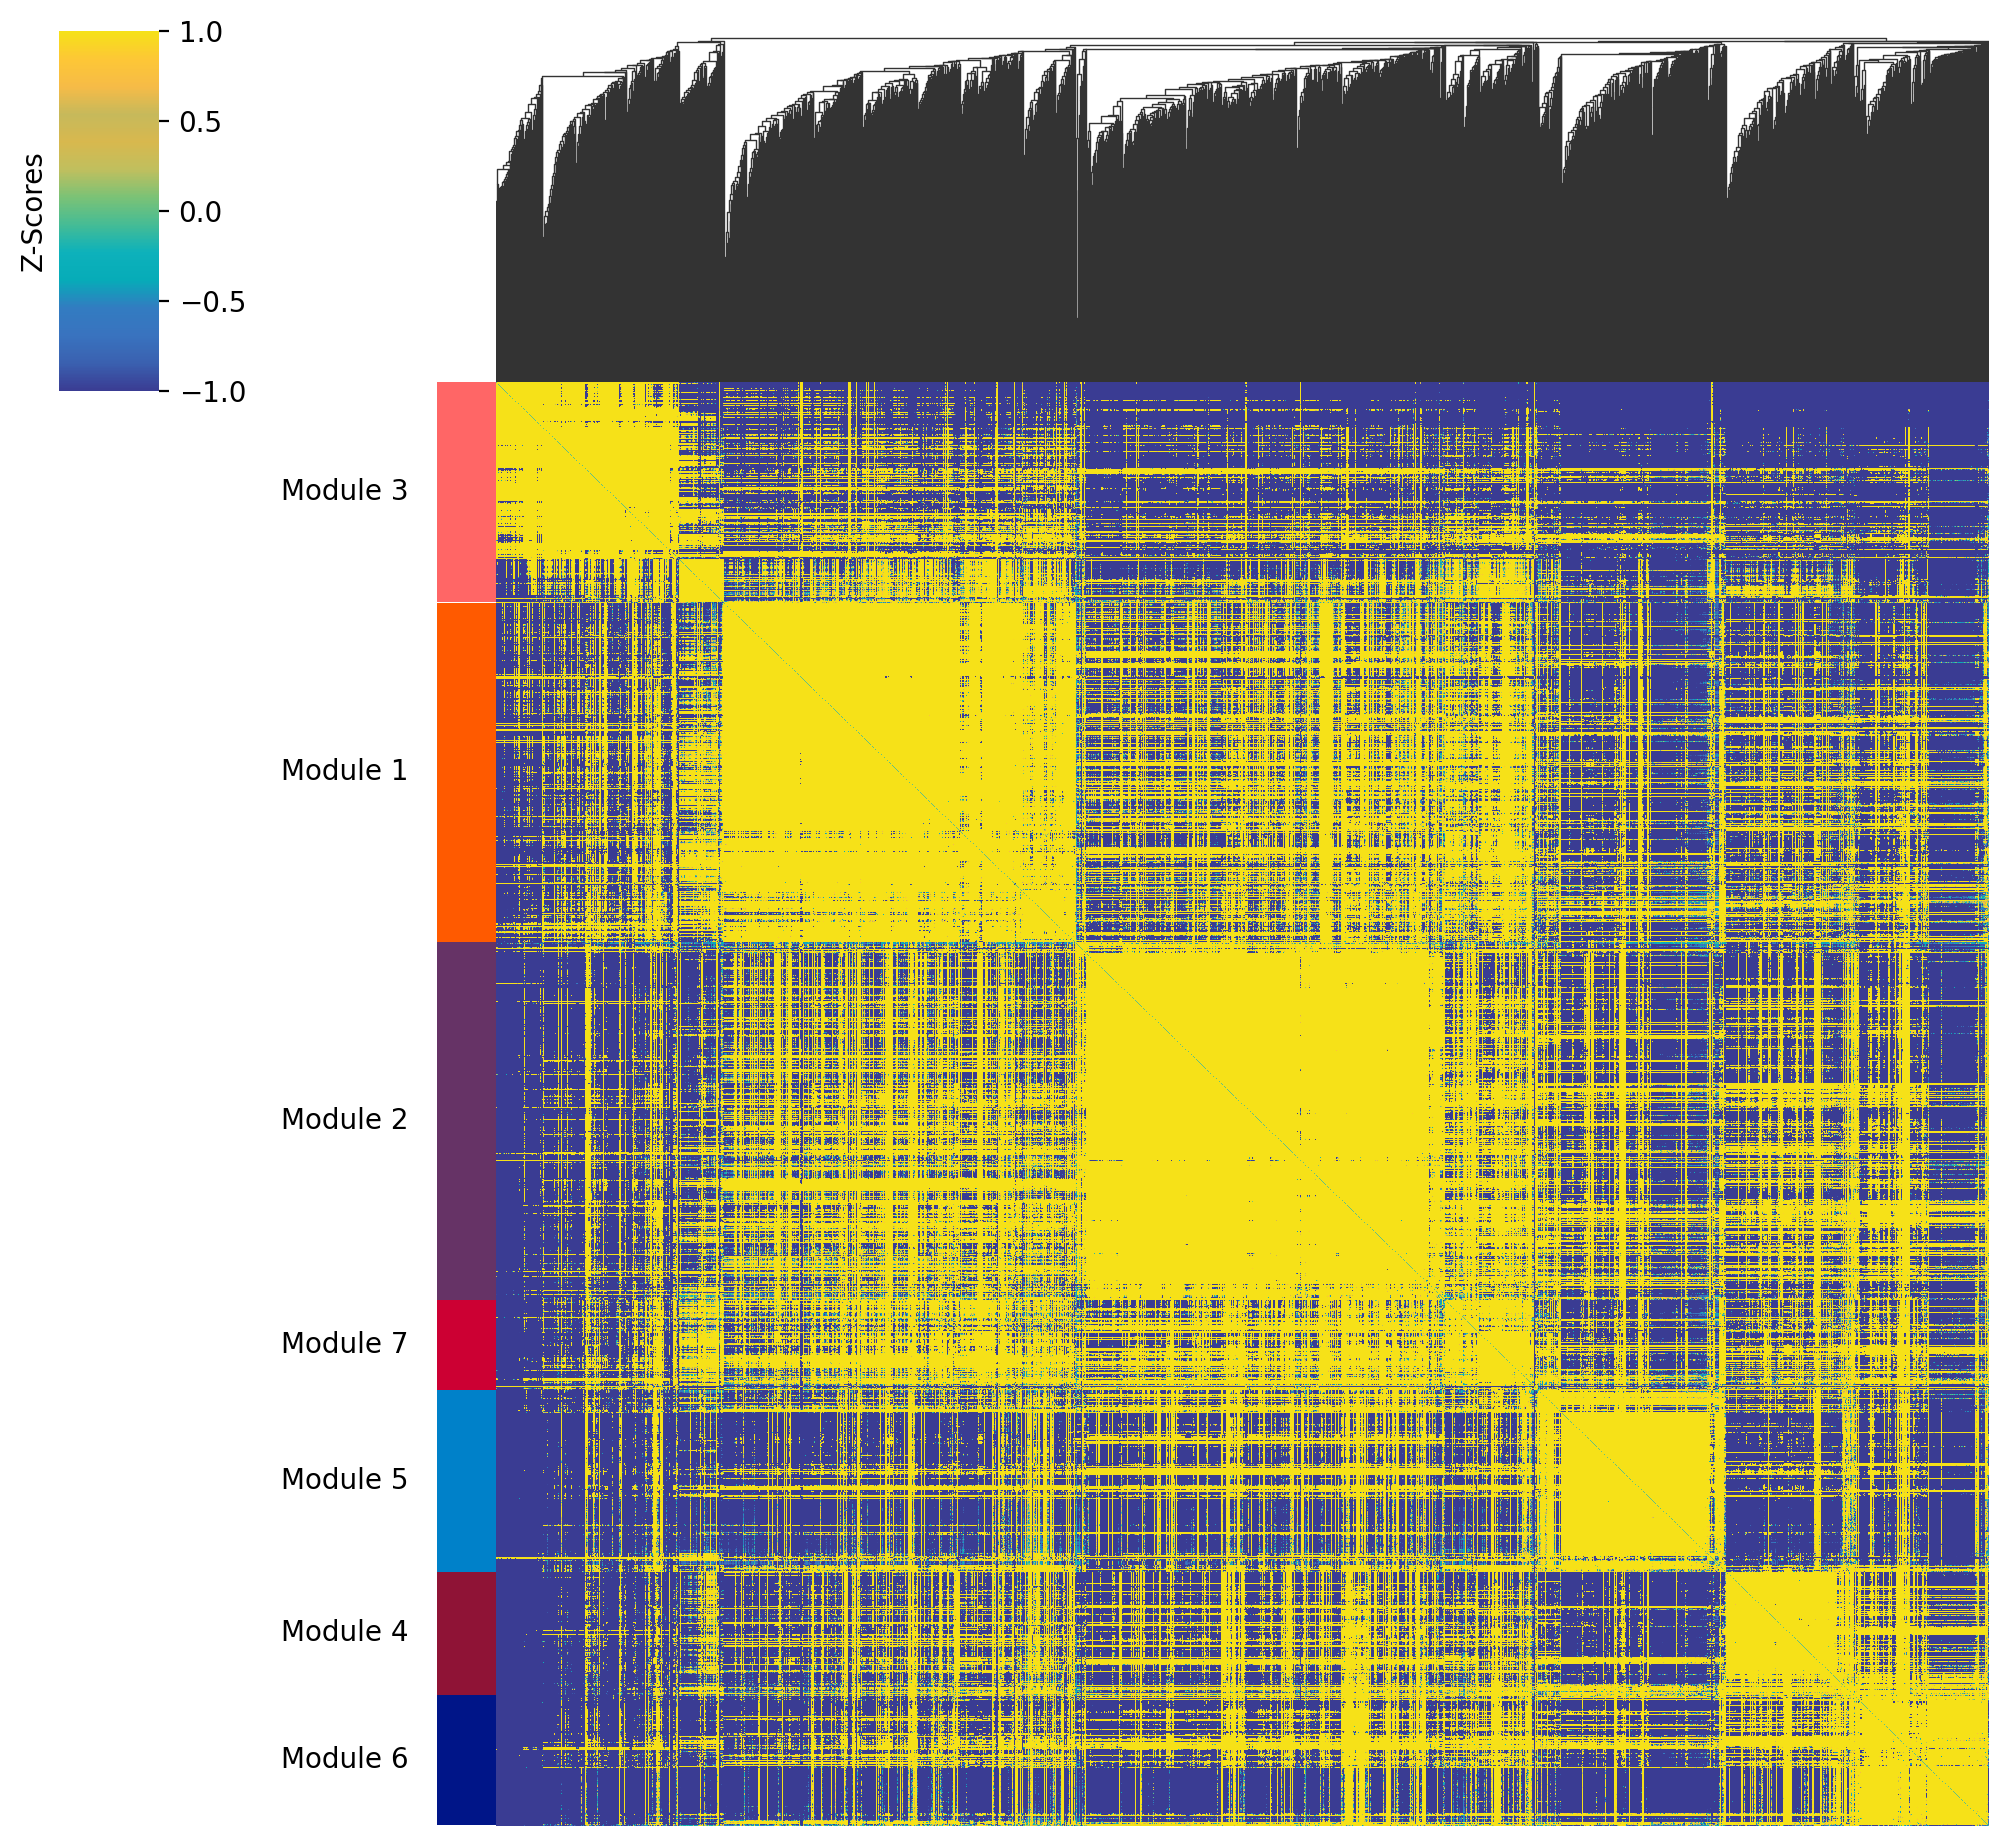

In [147]:
hsPBMC_Early.plot_local_correlations(vmin=-1, vmax=1, z_cmap=cmap,mod_cmap=cmap2)
plt.savefig( "/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure2/2024_Figure2A_early_hotspot.pdf")
# plt.savefig( "/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Last_Hotspot/hotspot_plot_local_correlations.svg", format='svg')

In [103]:
Hsmodule_scores = hsPBMC_Early.calculate_module_scores()

Hsmodule_scores.head()
Emodule_cols = []
for c in Hsmodule_scores.columns:
    key = f"Module {c}"
    PBMC_Early1.obs[key] = Hsmodule_scores[c]
    Emodule_cols.append(key)

Computing scores for 7 modules...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:12<00:00, 10.30s/it]


In [150]:
PE1=adata1[PBMC_Early1.obs_names]

In [151]:
Hsmodule_scores = hsPBMC_Early.calculate_module_scores()

Hsmodule_scores.head()
Emodule_cols = []
for c in Hsmodule_scores.columns:
    key = f"Module {c}"
    PE1.obs[key] = Hsmodule_scores[c]
    Emodule_cols.append(key)

Computing scores for 7 modules...


100%|███████████████████████████████████████████████████████████████| 7/7 [01:08<00:00,  9.79s/it]


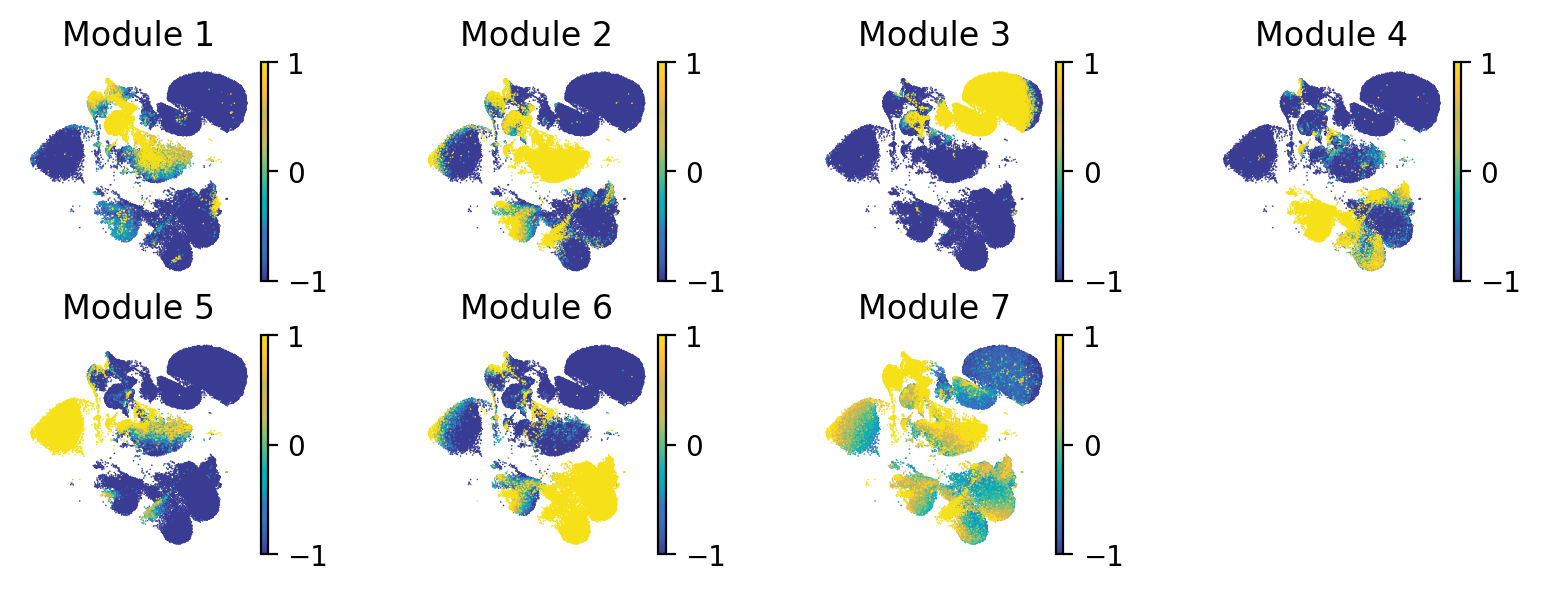

In [153]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [1.5, 1.5]
plt.rcParams['figure.dpi'] = 200
sc.pl.umap(PE1,color=Emodule_cols, frameon=False, vmin=-1 ,vmax=1,cmap=cmap,show=False)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure2/2024_Figure2C_early_hotspot_score.pdf")

In [137]:
Hlmodule_scores = hsPBMC_Late.calculate_module_scores()

Hlmodule_scores.head()

# plt.savefig("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Last_Hotspot/Umap8.pdf")

Computing scores for 14 modules...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [01:15<00:00,  5.41s/it]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Z96_AAACCTGAGAACTGTA-1,-1.687661,-1.494447,-2.468864,-1.902604,-2.138336,-4.931527,-3.371507,-2.635048,-0.790252,-0.492251,4.334094,-0.819786,-0.346806,-0.433546
Z96_AAACCTGAGAATAGGG-1,-1.466623,-1.354358,-2.530580,-1.778838,-2.291746,-4.573577,-3.392959,-2.630953,-0.723121,-0.461449,2.452030,-0.699820,-0.370766,-0.421818
Z96_AAACCTGAGATATGCA-1,-0.439799,0.460087,-2.383793,-1.310874,2.265600,10.360985,9.013662,-1.580681,0.623976,-0.477831,-2.614874,-0.258221,-0.335889,-0.776208
Z96_AAACCTGAGCCAGTTT-1,-0.468956,-0.400444,-2.335491,-1.385034,5.749612,15.795329,11.789391,-1.788863,0.127101,-0.446036,-2.606361,-0.433095,-0.288699,-0.848798
Z96_AAACCTGAGCCCAGCT-1,-1.500785,-1.869789,-2.600393,-2.070225,-2.404571,-5.512882,-3.953704,-2.959992,-0.726877,-0.395213,5.112485,-0.810473,-0.333855,-0.357179


In [138]:
PL1=adata1[PBMC_Late1.obs_names]

In [140]:
Lmodule_cols = []
for j in Hlmodule_scores.columns:
    key = f"Module {j}"
    PL1.obs[key] = Hlmodule_scores[j]
    Lmodule_cols.append(key)

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [1.5, 1.5]
plt.rcParams['figure.dpi'] = 200

sc.pl.umap(PL1,color=Lmodule_cols, frameon=False, vmin=-1 ,vmax=1,cmap=cmap,show=False)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure2/2024_Figure2D_Late_hotspot_score.pdf",bbox_inches='tight')

In [268]:
# get all modules in a dataframe
hsPBMC_Early_all_mods = hsPBMC_Early.results.join(hsPBMC_Early.modules)
hsPBMC_Early_all_mods.dropna( inplace=True)
# drop non assigned genes set to -1.0
hsPBMC_Early_all_mods = hsPBMC_Early_all_mods[hsPBMC_Early_all_mods['Module']!=-1.0]
hsPBMC_Early_all_mods.shape

(2402, 5)

In [162]:
hsPBMC_Early_all_mods 

,C,Z,Pval,FDR,Module
Gene,,,,,
CAMP,0.363675,10340.266006,0.000000,0.000000,2
HIST1H4H,0.627498,5571.710665,0.000000,0.000000,1
NRGN,0.884785,5173.508029,0.000000,0.000000,1
LCN2,0.397136,4501.471685,0.000000,0.000000,2
PPBP,0.844128,4333.893747,0.000000,0.000000,1
...,...,...,...,...,...
TRBV5-5,0.000806,1.358421,0.087165,0.087311,6
IGKV2D-30,0.000422,1.242718,0.106986,0.107120,5
TRBV15,-0.000010,-0.015849,0.506323,0.506745,6


In [218]:
# get all modules in a dataframe
hsPBMC_Late_all_mods = hsPBMC_Late.results.join(hsPBMC_Late.modules)
hsPBMC_Late_all_mods.dropna( inplace=True)
# drop non assigned genes set to -1.0
hsPBMC_Late_all_mods = hsPBMC_Late_all_mods[hsPBMC_Late_all_mods['Module']!=-1.0]
hsPBMC_Late_all_mods.shape

(2402, 5)

In [219]:
hsPBMC_Late_all_mods['M2']=hsPBMC_Late_all_mods['Module']

In [220]:
hsPBMC_Late_all_mods['Module'].replace(Lastcell_type_dict,inplace=True)

In [221]:
hsPBMC_Late_all_mods.to_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Last_Hotspot/202402hsPBMC_Late_all_mods.csv")

In [222]:
hsPBMC_Late_all_mods.Module.value_counts()

M2-Mono     730
M3-MK       395
M1-ERY      383
M5-Bcell    301
M7-Tcell    268
M6-NK       212
M4-STEM     113
Name: Module, dtype: int64

In [269]:
# EM_type_dict = {
#     1: 'Mono',
#     2: 'MK',
#     3: 'ERY',
#     4: 'NK',
#     5: 'Bcell',
#     6: 'Tcell',
#     7: 'STEM'
# }
EM_type_dict = {
    1: 'M3-MK',
    2: 'M2-Mono',
    3: 'M1-ERY',
    4: 'M6-NK',
    5: 'M5-Bcell',
    6: 'M7-Tcell',
    7: 'M4-STEM'
}

In [270]:
hsPBMC_Early_all_mods['M2']=hsPBMC_Early_all_mods['Module']
hsPBMC_Early_all_mods['Module']=hsPBMC_Early_all_mods['M2']

In [271]:
hsPBMC_Early_all_mods['Module'].replace(EM_type_dict,inplace=True)

In [272]:
hsPBMC_Early_all_mods

,C,Z,Pval,FDR,Module,M2
Gene,,,,,,
CAMP,0.363675,10340.266006,0.000000,0.000000,M2-Mono,2
HIST1H4H,0.627498,5571.710665,0.000000,0.000000,M3-MK,1
NRGN,0.884785,5173.508029,0.000000,0.000000,M3-MK,1
LCN2,0.397136,4501.471685,0.000000,0.000000,M2-Mono,2
PPBP,0.844128,4333.893747,0.000000,0.000000,M3-MK,1
...,...,...,...,...,...,...
TRBV5-5,0.000806,1.358421,0.087165,0.087311,M7-Tcell,6
IGKV2D-30,0.000422,1.242718,0.106986,0.107120,M5-Bcell,5
TRBV15,-0.000010,-0.015849,0.506323,0.506745,M7-Tcell,6


In [273]:
hsPBMC_Early_all_mods.to_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount//All_scanpyData/Last_Hotspot/202402hsPBMC_Early_all_mods.csv")

In [274]:
hsPBMC_Early_all_mods

,C,Z,Pval,FDR,Module,M2
Gene,,,,,,
CAMP,0.363675,10340.266006,0.000000,0.000000,M2-Mono,2
HIST1H4H,0.627498,5571.710665,0.000000,0.000000,M3-MK,1
NRGN,0.884785,5173.508029,0.000000,0.000000,M3-MK,1
LCN2,0.397136,4501.471685,0.000000,0.000000,M2-Mono,2
PPBP,0.844128,4333.893747,0.000000,0.000000,M3-MK,1
...,...,...,...,...,...,...
TRBV5-5,0.000806,1.358421,0.087165,0.087311,M7-Tcell,6
IGKV2D-30,0.000422,1.242718,0.106986,0.107120,M5-Bcell,5
TRBV15,-0.000010,-0.015849,0.506323,0.506745,M7-Tcell,6
